<h1>Sonar Rock vs. Mine Prediction</h1>

<div style="text-align: right" dir="rtl"> 
<h2>تعریف پروژه</h2>
این پروژه، یک مسئله‌ی binary classification است که از مجموعه‌داده‌ی sonar استفاده می‌کند. هدف آنست که مدلی طراحی شود که با دقت خوبی بتواند داده‌های آزمون را در یکی از دو کلاس M(Mine) و یا R(Rock) جا دهد.
برای این کار از پنج الگوریتم طبقه‌بندی استفاده شده است که در زیر فهرست شده‌اند:
<ol>
  <li>C-Support Vector Classification (SVC) </li>
  <li>K Nearest Neighbors (KNN) </li>
  <li>Decision Tree</li>
  <li>Random Forest</li>
  <li>AdaBoost</li>  
</ol>
</div>

<div style="text-align: right" dir="rtl"> 
<h2>معرفی مجموعه‌داده</h2>
مجموعه‌داده‌ی مورد استفاده sonardataset.csv است. این دیتاست شامل ۲۰۸ سطر و ۶۱ ستون است. هر سطر بیانگر یک نمونه بوده و می‌تواند برچسب M و یا R  داشته باشد. ستون آخر نشان‌دهنده‌ی برچسب هر نمونه است و شصت ستون باقیمانده، ویژگی‌های نمونه هستند.
</div>


<div style="text-align: right" dir="rtl"> 
ابتدا کتابخانه‌های مورد نیاز را import می‌کنیم.
</div>

In [1]:
# general 
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# model_selection 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

<div style="text-align: right" dir="rtl"> 
<h2>آماده‌سازی داده‌</h2>
در این بخش داده‌ها را از فایل می‌خوانیم. شصت ستون ابتدایی داده‌ها را در ماتریسی به نام X و برچسب‌ها را در برداری به نام y ذخیره می‌کنیم.
پیش از آنکه داده را به مدل‌های یادگیری ماشین تزریق کنیم، نیاز است کارهای زیر را انجام دهیم:
<ol>
  <li>بررسی missing values</li>
  <li>نرمال کردن داده‌ها</li>
  <li>encode کردن برچسب‌ها</li>
  <li>تقسیم مجموعه‌داده به دو بخش آموزش و تست</li>
</ol>
</div>

In [2]:
# reading data 
data = pd.read_csv("sonardata.csv", header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
# creating X and y
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

<div style="text-align: right" dir="rtl"> 
عدد مقابل شماره‌ی هر ستون از داده بیانگر تعداد valueهایی است که اصطلاحا گم شده‌اند و در دیتاست غایب‌اند. همانطور که می‌بینیم عدد متناظر تمام ستون‌ها برابر با صفر است که نشان می‌دهد هیچ ویژگی‌ای از هیچ نمونه‌ای از داده غایب نیست و در این مورد نیازی نیست اقدام خاصی انجام دهیم.
</div>

In [4]:
# checking for missing values
missing = data.iloc[:,:-1].isnull().sum()
missing

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
dtype: int64

<div style="text-align: right" dir="rtl"> 
جدول زیر نشان می‌دهد که داده‌های ما نرمال نیستند؛ چرا که mean صفر و std یک نیستند.
این موضوع می تواند دقت الگوریتم‌های یادگیری ماشین را کاهش دهد. بنابراین لازم است داده‌ی خود را استاندارد کنیم.
</div>

In [5]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
# normalizing data
scaler = StandardScaler()
X = scaler.fit_transform(X)

<div style="text-align: right" dir="rtl"> 
مشاهده می‌شود که پس از نرمالسازی سطرmean اعدادی در حد صفر و سطر std اعدادی در حد یک را شامل می‌شوند.
</div>

In [7]:
data.iloc[:,:-1] = scaler.fit_transform(data.iloc[:,:-1])
data.iloc[:,:-1].describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,...,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02
mean,1.708035e-17,6.832142e-17,-1.195625e-16,1.622634e-16,-1.793437e-16,2.049643e-16,1.024821e-16,3.416071e-17,-3.757678e-16,3.416071e-17,...,3.416071e-17,1.024821e-16,3.416071e-17,-1.451830e-16,2.775558e-17,-2.391250e-16,3.416071e-17,-1.110223e-16,1.345078e-16,7.686159e-17
std,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,...,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00
min,-1.206158e+00,-1.150725e+00,-1.104253e+00,-1.036115e+00,-1.236093e+00,-1.600493e+00,-1.921613e+00,-1.522110e+00,-1.443689e+00,-1.468833e+00,...,-1.341343e+00,-1.313126e+00,-1.449472e+00,-1.364897e+00,-1.229092e+00,-1.366868e+00,-1.302971e+00,-1.185113e+00,-1.271603e+00,-1.176985e+00
25%,-6.894939e-01,-6.686781e-01,-6.490624e-01,-6.359298e-01,-6.703975e-01,-6.367565e-01,-6.626732e-01,-6.400918e-01,-6.856590e-01,-7.232644e-01,...,-6.380641e-01,-6.394049e-01,-7.999231e-01,-7.642025e-01,-7.270112e-01,-6.678488e-01,-7.138771e-01,-6.738235e-01,-6.918580e-01,-6.788714e-01
50%,-2.774703e-01,-2.322506e-01,-2.486515e-01,-2.120457e-01,-2.292089e-01,-2.106432e-01,-2.400524e-01,-2.672134e-01,-2.180558e-01,-1.928459e-01,...,-1.810370e-01,-2.102002e-01,-1.645716e-01,-2.252935e-01,-2.532164e-01,-2.396997e-01,-3.240352e-01,-3.329639e-01,-2.499546e-01,-2.405314e-01
75%,2.784345e-01,2.893335e-01,3.682681e-01,2.285353e-01,4.524231e-01,5.012417e-01,5.232608e-01,4.096773e-01,4.692723e-01,4.507410e-01,...,3.970293e-01,3.438640e-01,5.950106e-01,4.886751e-01,3.973675e-01,4.112618e-01,4.513169e-01,3.719959e-01,3.865486e-01,4.020352e-01
max,4.706053e+00,5.944643e+00,6.836142e+00,8.025419e+00,5.878863e+00,4.710224e+00,4.074573e+00,3.816498e+00,4.274237e+00,3.746234e+00,...,7.039574e+00,5.980752e+00,4.016680e+00,3.330819e+00,5.008027e+00,5.448568e+00,4.795888e+00,5.585599e+00,4.615037e+00,7.450343e+00


<div style="text-align: right" dir="rtl"> 
برچسب‌های دادگان ما حروفی هستند و نیاز است برای استفاده از کتابخانه‌ي scikit learn به شکل درست، آن‌ها را به برچسب‌های عددی نظیر کنیم.  با اجرای کد زیر کلاس 0 متناظر با کلاس M و کلاس 1 متناظر با کلاس R خواهد بود.
</div>

In [8]:
# encoding labels {'M': 0, 'R': 1}
le = LabelEncoder()
y = le.fit_transform(y)

<div style="text-align: right" dir="rtl"> 
به کمک کد زیر،‌۲۵ درصد از داده‌ها را برای تست و مابقی را برای آموزش جدا می‌کنیم. دقت داریم که پارامتر shuffle به طور پیش‌فرض برای این تابع True است. شافل کردن داده‌ها برای ما ضروریست چرا که تمام داده‌هایی که برچسب یک دارند در بخش اول دیتاست و داده‌هایی با برچسب صفر در انتهای دیتاست قرار دارند و اگر بدون به هم ریختن ترتیب داده‌ها آن‌ها را جدا کنیم،‌تمام داده‌های تست،‌برچسب صفر خواهند داشت.
</div>

In [9]:
# splitting data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<div style="text-align: right" dir="rtl"> 
<h2>بررسی پنج الگوریتم یادگیری ماشین برای مسئله‌ی طبقه‌بندی</h2>
</div>

<h3>1. C-Support Vector Classification (SVC)</h3>

In [10]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [11]:
y_pred_svm = svm_clf.predict(X_test)
y_true_svm = y_test

<div style="text-align: right" dir="rtl"> 
accuracy این الگوریتم با در نظر گرفتن هایپرپارامترهای پیش‌فرض آن برابر با 92 درصد است.
</div>


In [12]:
print(classification_report(y_true_svm, y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        30
           1       0.88      0.95      0.91        22

    accuracy                           0.92        52
   macro avg       0.92      0.93      0.92        52
weighted avg       0.93      0.92      0.92        52



<div style="text-align: right" dir="rtl"> 
<h4>تحلیل confusion matrix</h4>
در این بخش تحلیل کوچکی روی ماتریس confusion ارايه می‌شود و می‌توان آن را به ماتریس‌های confusion متدهای دیگر نیز تعمیم داد:
این ماتریس نشان می‌دهد که از مجموع ۳۰ داده‌ای که ما انتظار داشتیم در کلاس صفر طبقه‌بندی شوند،‌۲۷ تا از آن‌ها درست طبقه‌بندی شده‌اند و به تبع آن سه تا از آن‌ها به اشتباه توسط مدل در کلاس یک طبقه‌بندی شده‌اند.
به همین ترتیب
از مجموع ۲۲ داده‌ای که ما انتظار داشتیم در کلاس یک طبقه‌بندی شوند،‌۲۱ تا از آن‌ها درست طبقه‌بندی شده‌اند و به تبع آن یکی از آن‌ها به اشتباه توسط مدل در کلاس صفر طبقه‌بندی شده است.
</div>

In [13]:
confusion_matrix(y_true_svm, y_pred_svm)

array([[27,  3],
       [ 1, 21]])

<h3>2. K Nearest Neighbors (KNN) </h3>

In [14]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred_knn = knn_clf.predict(X_test)
y_true_knn = y_test

<div style="text-align: right" dir="rtl"> 
accuracy این الگوریتم با در نظر گرفتن هایپرپارامترهای پیش‌فرض آن برابر با 90 درصد است.
</div>

In [16]:
print(classification_report(y_true_knn, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91        30
           1       0.84      0.95      0.89        22

    accuracy                           0.90        52
   macro avg       0.90      0.91      0.90        52
weighted avg       0.91      0.90      0.90        52



In [17]:
confusion_matrix(y_true_knn, y_pred_knn)

array([[26,  4],
       [ 1, 21]])

<h3>3. Desicion Tree</h3>

In [18]:
dtree_clf = DecisionTreeClassifier()
dtree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
y_pred_dtree = dtree_clf.predict(X_test)
y_true_dtree = y_test

<div style="text-align: right" dir="rtl"> 
accuracy این الگوریتم با در نظر گرفتن هایپرپارامترهای پیش‌فرض آن برابر با 69 درصد است.
</div>

In [20]:
print(classification_report(y_true_dtree, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70        30
           1       0.61      0.77      0.68        22

    accuracy                           0.69        52
   macro avg       0.70      0.70      0.69        52
weighted avg       0.71      0.69      0.69        52



In [21]:
confusion_matrix(y_true_dtree, y_pred_dtree)

array([[19, 11],
       [ 5, 17]])

<div style="text-align: right" dir="rtl"> 
همانطور که می‌بینیم دقت این الگوریتم نسبت به دو الگوریتم قبل تا حد زیادی کاهش یافته است. دلیل این امر آنست که درخت تصمیم به شکل خالص، بسیار وسواسی عمل می‌کند و اصطلاحا مدل دچار بیش‌برازش یا overfitting شده است.
برای اینکه این موضوع شفاف‌تر شود، یک بار دیگر مدل را با داده‌های آموزش تست می‌کنیم و می‌بینیم که دقت مدل بر روی داده‌های آموزش، صد درصد است.
</div>

In [22]:
y_pred_dtree = dtree_clf.predict(X_train)
y_true_dtree = y_train

In [23]:
print(classification_report(y_true_dtree, y_pred_dtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        75

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



<div style="text-align: right" dir="rtl"> 
با استفاده از کد زیر می‌توانیم شکل درخت تصمیم را ببینیم. همانطور که مشاهده می‌کنیم مدل کار را تا جایی ادامه می‌دهد که gini متناظر  هر برگ از درخت برابر صفر شود. gini معیار ناخالصی است که صفر بودنش به معنای کاملا خالص بودن و به عبارتی دیگر قاطعیت کامل می‌باشد.
</div>

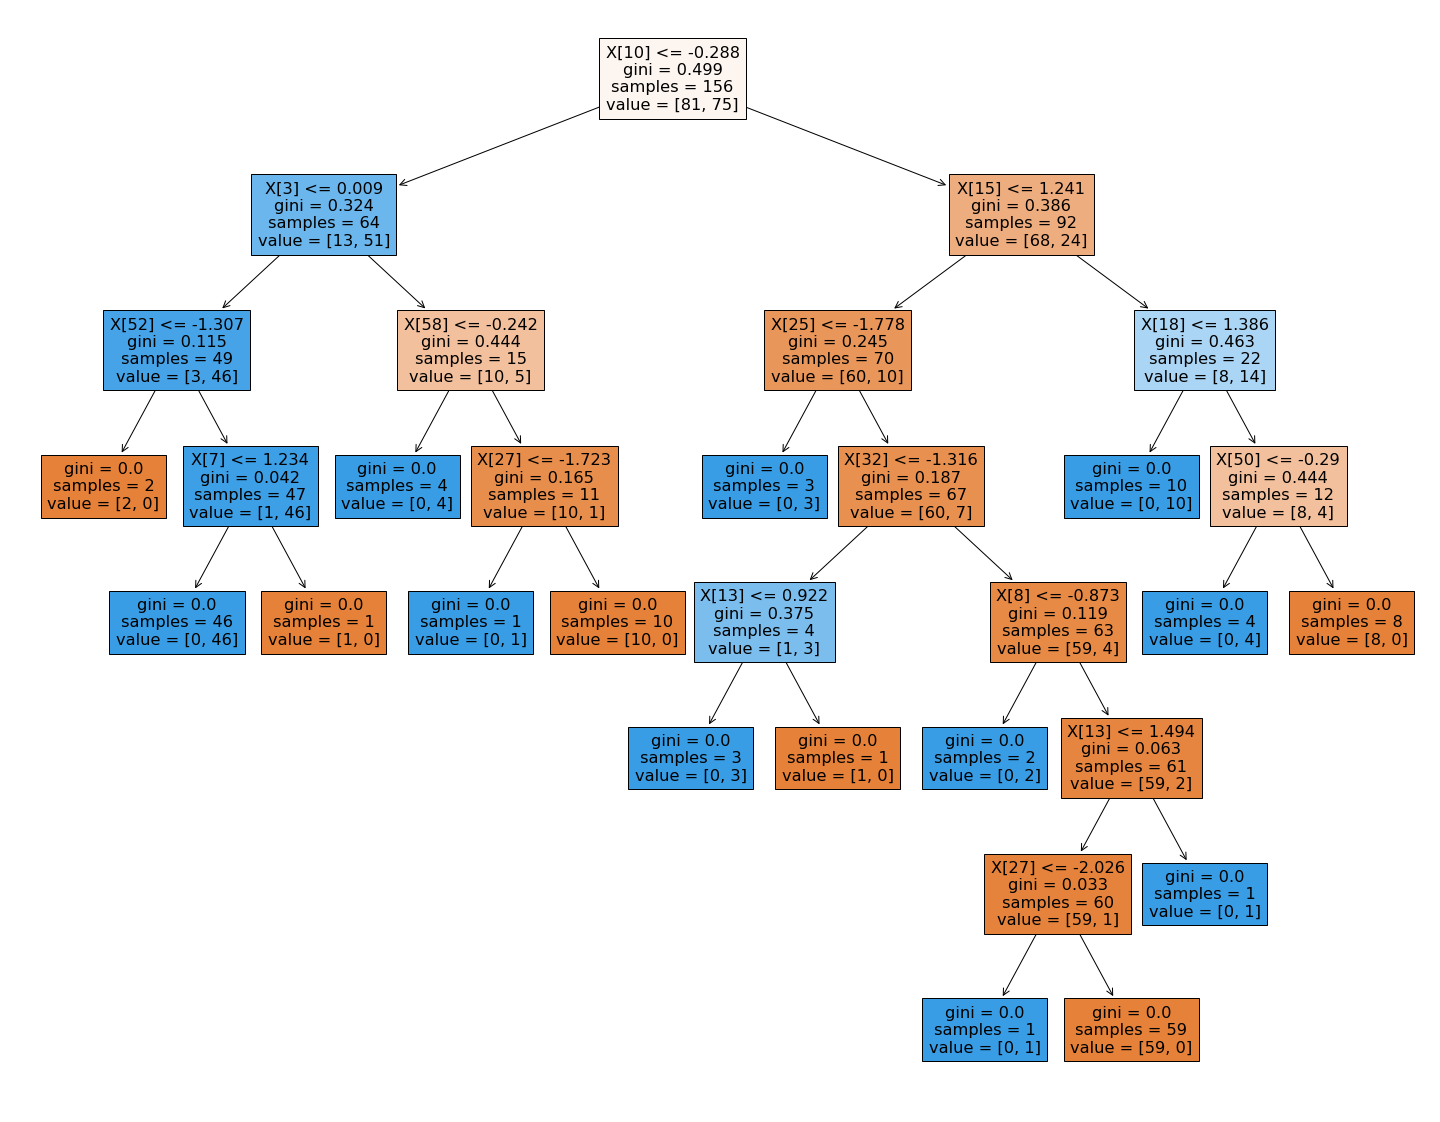

In [24]:
fig = plt.figure(figsize=(25,20))
dt = tree.plot_tree(dtree_clf, 
                   filled=True)

<h3>4. Random Forest</h3>

<div style="text-align: right" dir="rtl"> 
این متد از جمله متدهای ترکیبی یا اصطلاحا Ensemble می‌باشد.
</div>

In [25]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
y_pred_rf = rf_clf.predict(X_test)
y_true_rf = y_test

<div style="text-align: right" dir="rtl"> 
accuracy این الگوریتم با در نظر گرفتن هایپرپارامترهای پیش‌فرض آن برابر با 87 درصد است.
</div>

In [27]:
print(classification_report(y_true_rf, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.80      0.91      0.85        22

    accuracy                           0.87        52
   macro avg       0.86      0.87      0.86        52
weighted avg       0.87      0.87      0.87        52



In [28]:
confusion_matrix(y_true_rf, y_pred_rf)

array([[25,  5],
       [ 2, 20]])

<h3>5. AdaBoost</h3>

<div style="text-align: right" dir="rtl"> 
این متد نیز هم‌چون متد Random Forest جزو روش‌های ترکیبی است.
</div>

In [33]:
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

AdaBoostClassifier()

In [34]:
y_pred_ab = dtree_clf.predict(X_test)
y_true_ab = y_test

<div style="text-align: right" dir="rtl"> 
accuracy این الگوریتم با در نظر گرفتن هایپرپارامترهای پیش‌فرض آن برابر با 69 درصد است. 
که مشابه الگوریتم درخت تصمیم درصد پایینی به حساب می‌آید.
</div>

In [35]:
print(classification_report(y_true_ab, y_pred_ab))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70        30
           1       0.61      0.77      0.68        22

    accuracy                           0.69        52
   macro avg       0.70      0.70      0.69        52
weighted avg       0.71      0.69      0.69        52



<div style="text-align: right" dir="rtl"> 
<h2>تنظیم هایپرپارامترها</h2>
تمام مدل‌هایی که آزمایش شدند، با فرض هایپرپارامترهای پیش‌فرض خود کتابخانه‌یscikit learn بودند. الزاما مقادیر پیش‌فرض بهترین نتیجه را به 
دست نمی‌دهند و برای دستیابی به دقت‌های بالاتر، می‌توان این هایپرپارامترها را تنظیم کرد.
</div>

In [36]:
# Tuning hyperparameters using GridSearchCV

# svm_clf = SVC()
# params = {
#     #'C': [0, 0.5, 1, 1.5, 2],
#     'C': [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 5],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#     }
# kfold = KFold(n_splits = 5, random_state = 42, shuffle = True)
# gsh = GridSearchCV(SVC(), param_grid = params, scoring = 'accuracy', cv = kfold, verbose = 4)
# gsh.fit(X, y)
# gsh.best_score_

In [37]:
# Future Works :D

# Tuning hyperparameters using GridSearchCV
# Feature selection
# Balancing the dataset